In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemansky","key":"fff7a13a65534b11168b3f819b6da8f0"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              231KB  2021-06-22 06:09:25           8031  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4903  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1659  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-21 13:35:12           2272  
mathurinache/twitter-edge-nodes                               Tw

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=3d955cdbd0e3c13d7e58039eeca9e7335a64bd08771ce7b21c508da9782dcbad
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 96% 313M/325M [00:02<00:00, 126MB/s]
100% 325M/325M [00:02<00:00, 122MB/s]


# New Section

In [ ]:
!unzip '/content/skin-cancer-malignant-vs-benign.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/benign/420.jpg  
  inflating: /content/data/train/benign/421.jpg  
  inflating: /content/data/train/benign/422.jpg  
  inflating: /content/data/train/benign/423.jpg  
  inflating: /content/data/train/benign/424.jpg  
  inflating: /content/data/train/benign/425.jpg  
  inflating: /content/data/train/benign/426.jpg  
  inflating: /content/data/train/benign/429.jpg  
  inflating: /content/data/train/benign/43.jpg  
  inflating: /content/data/train/benign/430.jpg  
  inflating: /content/data/train/benign/431.jpg  
  inflating: /content/data/train/benign/432.jpg  
  inflating: /content/data/train/benign/434.jpg  
  inflating: /content/data/train/benign/435.jpg  
  inflating: /content/data/train/benign/438.jpg  
  inflating: /content/data/train/benign/439.jpg  
  inflating: /content/data/train/benign/440.jpg  
  inflating: /content/data/train/benign/441.jpg  
  inflating: /content/data/train/benign/442.jpg  


# $Building~ the~Inception~ model$

In [ ]:
import numpy as  np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns




import cv2


import tensorflow as tf
# from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D , BatchNormalization , Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
#variables : 

img_width = 150
img_height = 150
batch_size = 16

epochs = 16


In [ ]:
input_shape = (img_width , img_height )

In [ ]:
input_shape

(150, 150)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tarin_dir = '/content/train'
tarin_data_gen = ImageDataGenerator(rescale= 1/255, 
                              shear_range = 20 , 
                              rotation_range = 60 , 
                              horizontal_flip = True ,
                              vertical_flip=False, 
                             height_shift_range=0.5 ,
                             width_shift_range = 0.6)


aug_train_img = tarin_data_gen.flow_from_directory(tarin_dir ,
                                                        target_size = input_shape , 
                                                        class_mode = 'binary' ,
                                                        batch_size = batch_size)


Found 2637 images belonging to 2 classes.


In [ ]:
val_data_gen = ImageDataGenerator(rescale= 1/255)

val_dir = '/content/test'

aug_val_img = val_data_gen.flow_from_directory(tarin_dir ,
                                              target_size = input_shape , 
                                              class_mode = 'binary' ,
                                              batch_size = batch_size)

Found 2637 images belonging to 2 classes.


In [ ]:
aug_train_img.samples , aug_val_img.samples

(2637, 2637)

# $Inception$

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model=InceptionV3(include_top=False, weights='imagenet', input_shape=(150,150,3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
pre_trained_model.get_layer('mixed7')

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x_pr_op = layers.Flatten()(last_output)


x = layers.Dense(1024, activation='relu')(x_pr_op)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512 , activation = 'relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256 , activation= 'relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(1, activation='sigmoid')(x)
inc_model = Model(pre_trained_model.input, x)

inc_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=['acc'])



TypeError: ignored

In [ ]:
layer.trainable ==True

False

In [ ]:
inc_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
nb_samples_train = aug_train_img.samples
nb_samples_val = aug_val_img.samples 

In [ ]:
history_inc = inc_model.fit_generator(aug_train_img ,
                        steps_per_epoch =nb_samples_train//batch_size , 
                        epochs = 28  , 
                        validation_data = aug_val_img , 
                        validation_steps = nb_samples_val//batch_size
                        
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/28
164/164 [==============================] - 57s 151ms/step - loss: 0.6832 - acc: 0.6101 - val_loss: 0.7320 - val_acc: 0.5789
Epoch 2/28
164/164 [==============================] - 23s 142ms/step - loss: 0.5889 - acc: 0.6929 - val_loss: 0.8081 - val_acc: 0.5709
Epoch 3/28
164/164 [==============================] - 24s 145ms/step - loss: 0.5320 - acc: 0.7486 - val_loss: 0.5930 - val_acc: 0.6463
Epoch 4/28
164/164 [==============================] - 23s 141ms/step - loss: 0.4984 - acc: 0.7642 - val_loss: 0.7029 - val_acc: 0.5857
Epoch 5/28
164/164 [==============================] - 23s 142ms/step - loss: 0.4730 - acc: 0.7776 - val_loss: 0.4892 - val_acc: 0.7649
Epoch 6/28
164/164 [==============================] - 23s 142ms/step - loss: 0.4729 - acc: 0.7833 - val_loss: 0.4888 - val_acc: 0.7633
Epoch 7/28
164/164 [==============================] - 23s 141ms/step - loss: 0.4488 - acc: 0.7932 - val_loss: 0.5241 - val_acc: 0.7168
Epoch 8/28
164/164 [==============================] - 2

In [ ]:
history_inc.history.keys()

In [ ]:
history_inc.history['acc']

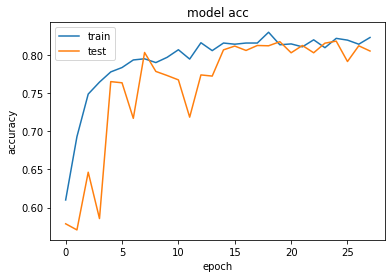

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_inc.history['acc'])
plt.plot(history_inc.history['val_acc'])
# plt.plot(history_inc.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

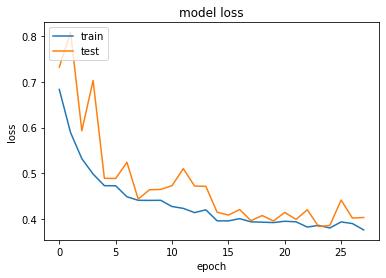

In [ ]:
plt.plot(history_inc.history['loss'])
plt.plot(history_inc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

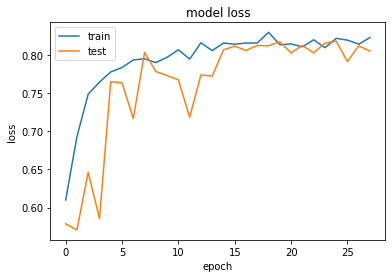

In [ ]:
plt.plot(history_inc.history['acc'])
plt.plot(history_inc.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Random forest

In [ ]:
from sklearn.model_selection import train_test_split






In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []

for num_trees in range(1, 200):
    rf_classifier = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
    rf_classifier.fit(x_train , y_train)
    rf_pred = rf_classifier.predict(x_test)

    rf_acc.append(accuracy_score(y_test,rf_pred))
    rf_cm.append(confusion_matrix(y_test,rf_pred))
    
max_acc = max(rf_acc)
max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['RandomForestClassifier', max_acc])
# 0.933 without sc

In [ ]:
ls = ['/content/test/benign/1003.jpg' , '/content/test/benign/1013.jpg' , 
      '/content/test/benign/1126.jpg' , '/content/test/benign/1214.jpg' , 
      '/content/test/benign/1545.jpg' ,
      '/content/train/malignant/1024.jpg' , '/content/train/malignant/1052.jpg' , 
      '/content/train/malignant/1090.jpg' , '/content/test/malignant/1019.jpg' ,
      '/content/test/malignant/940.jpg']

In [ ]:
pred_list = []
for i in ls:
  import numpy as np

  from tensorflow.keras.preprocessing import image
  test_image=image.load_img( i ,target_size=(img_width,img_height))
  test_image=image.img_to_array(test_image)
  test_image = test_image/255
  test_image=np.expand_dims(test_image,axis=0)
  result=inc_model.predict(test_image)
  pred_list.append(result)
  if result >0.5 :
    print('You have Malignant Tumour')
  else:
    
    print('You have Benign Tumour')



'''


  img = tf.keras.preprocessing.image.load_img (i,
                                              color_mode='rgb', 
                                              target_size=(150, 150))
  img_array = tf.keras.preprocessing.image.img_to_array(img)

  # plt.imshow(img_array.reshape(150, 150 ,3))
  pred = inc_model.predict(img_array.reshape(1, 150,150, 3))
  '''

print(pred_list)

You have Benign Tumour
You have Benign Tumour
You have Benign Tumour
You have Benign Tumour
You have Benign Tumour
You have Malignant Tumour
You have Malignant Tumour
You have Benign Tumour
You have Benign Tumour
You have Malignant Tumour
[array([[0.00897322]], dtype=float32), array([[0.00046404]], dtype=float32), array([[0.30034307]], dtype=float32), array([[0.000794]], dtype=float32), array([[0.04868632]], dtype=float32), array([[0.6461166]], dtype=float32), array([[0.518097]], dtype=float32), array([[0.19532815]], dtype=float32), array([[0.25066608]], dtype=float32), array([[0.70984805]], dtype=float32)]


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0
